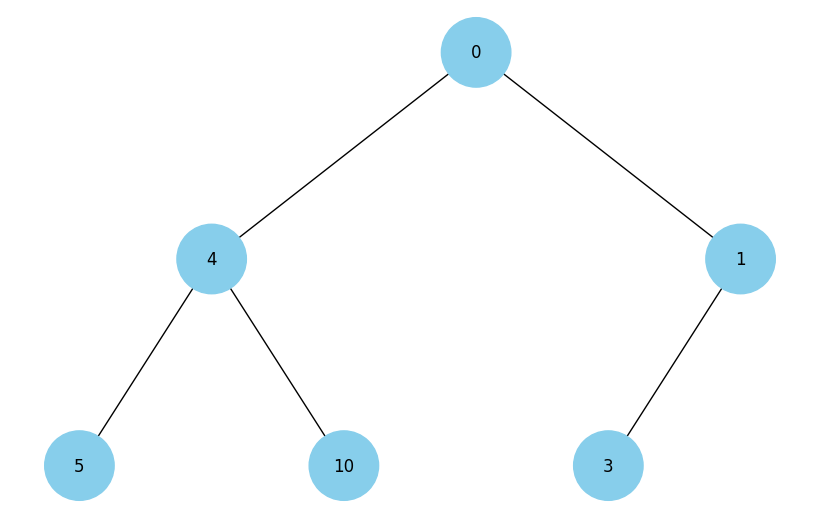

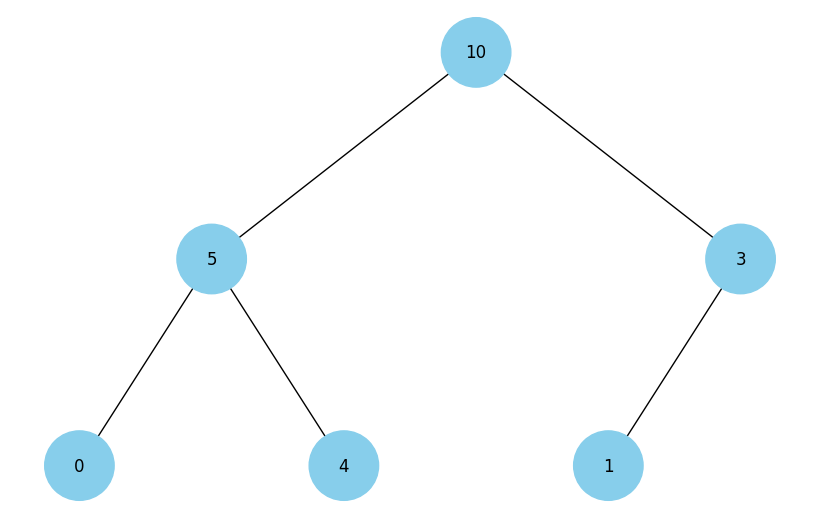

In [77]:
import uuid

import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color  # Додатковий аргумент для зберігання кольору вузла
        self.id = str(uuid.uuid4())  # Унікальний ідентифікатор для кожного вузла

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)  # Використання id та збереження значення вузла
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}  # Використовуйте значення вузла для міток

    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()


# Створення дерева
root = Node(0)
root.left = Node(4)
root.left.left = Node(6)
# root.left.left = Node(5)
root.left.right = Node(5)
# root.left.right = Node(6)
root.right = Node(10)
# root.right.right = Node(1)
root.right.right = Node(3)
# root.right.left = Node(3)
root.right.left = Node(1)

def basic_bypass(node):
  current=node
  if current is None:
    return current

  if current.left is None:
    return current

  if current.right is None:
    return current

  if current.left.val > current.right.val:
    if (current.left.val>current.val):
      temp=current.val
      temp_left=current.left.val
      current.left.val=temp
      current.val=temp_left
    return current

  else:
    if (current.right.val > current.val):
      temp=current.val
      temp_right=current.right.val
      current.right.val=temp
      current.val=temp_right
    return current

def left_bypass(node):
  current=node

  if current.left.left.val > current.left.val:
    if current.left.left.val>current.left.right.val:
      temp=current.left.val
      temp_left=current.left.left.val
      current.left.left.val=temp
      current.left.val=temp_left
    else:
      temp=current.left.val
      temp_right=current.left.right.val
      current.left.right.val=temp
      current.left.val=temp_right
    return current

  else:
    if (current.left.right.val > current.left.val):
      temp=current.left.val
      temp_right=current.left.right.val
      current.left.right.val=temp
      current.left.val=temp_right
    return current

def right_bypass(node):
  current=node
  if current.right.right is None:
    if current.right.left.val>current.right.val:
      temp=current.right.left.val
      temp_left= current.right.val
      current.right.val=temp
      current.right.left.val=temp_left
    return current

  if current.right.left.val > current.right.right.val:
    if current.right.left.val > current.right.right.val:
      temp=current.right.val
      temp_left=current.right.left.val
      current.right.val=temp_left
      current.right.left.val=temp
    return current

  else:
    if current.right.right.val > current.right.val:
      temp=current.right.val
      temp_right=current.right.right.val
      current.right.right.val=temp
      current.right.val=temp_right
    return current


# Створення дерева
root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)
# Відображення дерева
draw_tree(root)

# Для Купи значення кожного вузла має перевищувати значення кожного з його нащадків.
root=left_bypass(root)
root=right_bypass(root)
root=basic_bypass(root)
root=left_bypass(root)
root=right_bypass(root)
draw_tree(root)
